In [48]:
import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split
import os.path


dir_fake = '../../data/C2ST_diana/results-dcgan/'
split_path=  'splits/dcgan'

dir_fake = 'datasets/results-dfi/'
split_path=  'splits/dfi'

# dir_fake = 'datasets/results-wo-discr/'
# split_path=  'splits/wo-discr'

# dir_fake = 'datasets/results-l50-planevgg'
# split_path=  'splits/l50-planevgg'

# dir_fake = 'datasets/results-l50'
# split_path=  'splits/l50'

In [47]:
# a = sorted(glob(f'../deepfeatinterp/inputs/inputs/*_smile.png'))

# !mkdir datasets/results-dfi/
# for x in list(filter(lambda x: x.count('_') == 2, a)):
#     shutil.copy(x, 'datasets/results-dfi/')

2

In [49]:
train_df = pd.DataFrame()

def get_df(imgs_train, imgs_val, label):
    train_df = pd.DataFrame()
    val_df   = pd.DataFrame()
    
    train_df['fpath'] = imgs_train
    val_df['fpath']   = imgs_val

    train_df['label'] = label
    val_df['label']   = label
    
    return train_df, val_df

# Fake
dir_path = dir_fake
imgs = sorted(glob(f'{dir_path}/*'))
imgs_train, imgs_val = train_test_split(imgs, random_state=444)

train_df_fake, val_df_fake = get_df(imgs_train, imgs_val, 0)

In [50]:
# Real
dir_path = '/sdh/data/celebA/imgs1/*'
imgs = sorted(glob(f'{dir_path}/*'))
t = pd.DataFrame(imgs, columns=['fpath'])
t['fname'] = t.fpath.apply(lambda x: os.path.basename(x))
smiles_celeba = pd.read_csv('datasets/celeba_smiles.txt', header=None)[0]
t  = t.loc[t.fname.isin(smiles_celeba)]

imgs_train, imgs_val = train_test_split(t['fpath'])
train_df_real, val_df_real = get_df(imgs_train, imgs_val, 1)

# imgs_train, imgs_val = train_test_split(imgs)
# train_df_real, val_df_real = get_df(imgs_train, imgs_val, 1)

In [51]:
print(train_df_real.shape , train_df_fake.shape)

(7324, 2) (7493, 2)


In [53]:
train_df = pd.concat([train_df_real, train_df_fake], axis=0, ignore_index=True)
val_df   = pd.concat([val_df_real, val_df_fake], axis=0, ignore_index=True)

In [54]:
train_df.to_csv(f'{split_path}/train.csv')
val_df.to_csv(f'{split_path}/val.csv')

In [58]:
__imp

/home/dulyanov/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [65]:
# plt.
def process_lfw_image(img):
    return Image.fromarray(np.array(img)[35:35+160,35:10+160,:])
    #     return Image.fromarray(np.array(img)[35:35+160,10:10+160,:])

from PIL import Image

/home/dulyanov/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


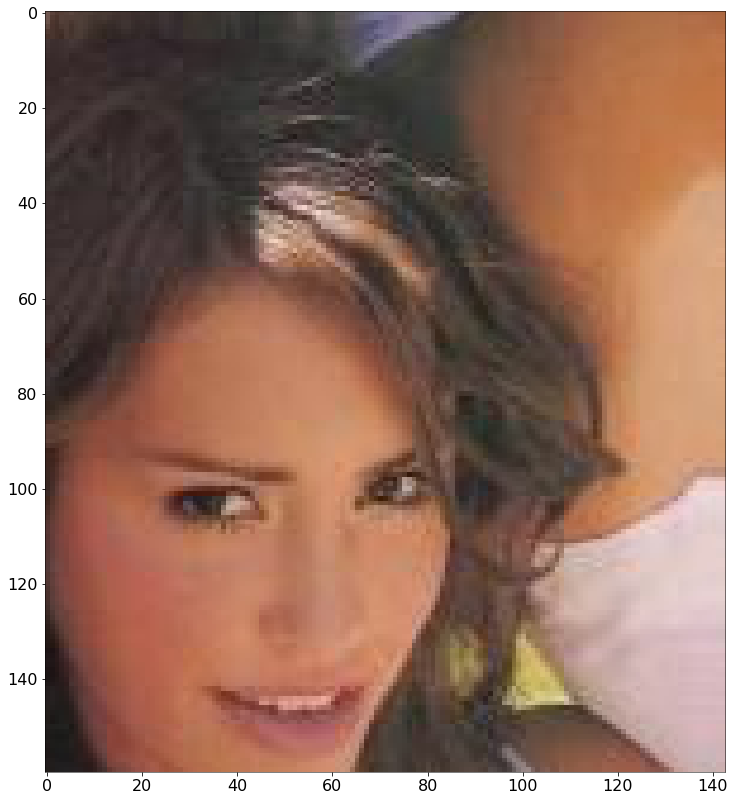

In [66]:
plt.imshow(process_lfw_image(Image.open(train_df.loc[123, 'fpath'])))